In [1]:
import matplotlib.pyplot as plt
import os
print(os.getcwd())

import sys
sys.path.append('../src')
from GAN import model_gan

d:\Digitalization\AnomalyDetectionTimeSeries\MultivariateTimeSeries\notebook


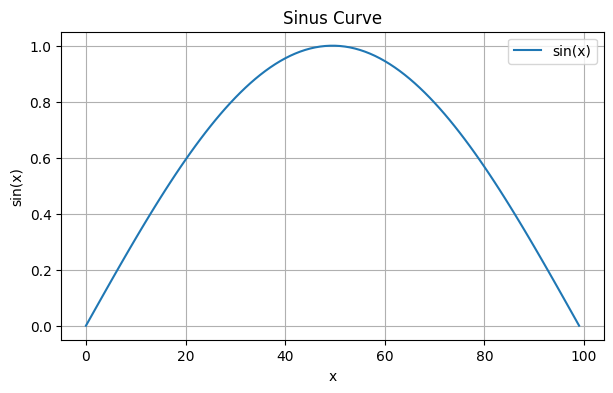

In [2]:
# 生成真实数据  
index, y, data = model_gan.generate_real_samples(100)

# 绘制正弦曲线
plt.figure(figsize=(7, 4))  # 设置图形大小
plt.plot(index, y, label='sin(x)')  # 绘制曲线
plt.title('Sinus Curve')  # 添加标题
plt.xlabel('x')  # x轴标签
plt.ylabel('sin(x)')  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.show()  # 显示图形

### Generator Network Structure

| Layer No. | Layer Type   | Input Dimension | Output Dimension | Activation Function |
|-----------|--------------|-----------------|------------------|---------------------|
| 1         | Linear       | 100             | 256              | -                   |
|           | ReLU         | -               | -                | ReLU                |
| 2         | Linear       | 256             | 128              | -                   |
|           | ReLU         | -               | -                | ReLU                |
| 3         | Linear       | 128             | 100              | -                   |

### Discriminator Network Structure

| Layer No. | Layer Type   | Input Dimension | Output Dimension | Activation Function  |
|-----------|--------------|-----------------|------------------|----------------------|
| 1         | Linear       | 100             | 128              | -                    |
|           | LeakyReLU    | -               | -                | LeakyReLU            |
| 2         | Linear       | 128             | 64               | -                    |
|           | LeakyReLU    | -               | -                | LeakyReLU            |
| 3         | Linear       | 64              | 1                | -                    |
| o         | Sigmoid      | -               | -                | Sigmoid              |

These tables offer a basic overview of the network structures for the generator and discriminator. The input and output dimensions listed correspond to the number of neurons in each layer

In [10]:
import torch.nn as nn
import torch
import torch.optim as optim

# Hyperparameterss
batch_size = 1000
lr = 3e-6
epochs = 2800
latent_dim = 100

# Define generator
generator = model_gan.Generator()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
# Define discriminator
discriminator = model_gan.Discriminator()
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)
loss = nn.BCELoss()

# Training loop
for epoch in range(1,epochs+1):
    # Generate real and fake data
    real_data = torch.tensor(model_gan.generate_real_samples(batch_size)[2],
                             dtype=torch.float).view(batch_size, -1)
    fake_data = generator(torch.randn(batch_size, latent_dim))
    
    # Train discriminator
    d_loss = model_gan.train_discriminator(
        discriminator, optimizer_D, real_data, fake_data, loss)
    
    # Train generator
    g_loss = model_gan.train_generator(
        generator,discriminator, optimizer_G, latent_dim, batch_size, loss)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

Epoch: 100, D Loss: 1.371913194656372, G Loss: 0.66390061378479
Epoch: 200, D Loss: 1.3584027290344238, G Loss: 0.6629948616027832
Epoch: 300, D Loss: 1.345404863357544, G Loss: 0.6620395183563232
Epoch: 400, D Loss: 1.3330204486846924, G Loss: 0.6606689095497131
Epoch: 500, D Loss: 1.3219010829925537, G Loss: 0.6595703363418579
Epoch: 600, D Loss: 1.3118197917938232, G Loss: 0.6579341888427734
Epoch: 700, D Loss: 1.3025208711624146, G Loss: 0.6563711762428284
Epoch: 800, D Loss: 1.2935702800750732, G Loss: 0.6546571254730225
Epoch: 900, D Loss: 1.2849347591400146, G Loss: 0.6534642577171326
Epoch: 1000, D Loss: 1.2762614488601685, G Loss: 0.652618408203125
Epoch: 1100, D Loss: 1.2677545547485352, G Loss: 0.6516382694244385
Epoch: 1200, D Loss: 1.2593427896499634, G Loss: 0.6510306000709534
Epoch: 1300, D Loss: 1.250576138496399, G Loss: 0.6507660150527954
Epoch: 1400, D Loss: 1.241657018661499, G Loss: 0.6504795551300049
Epoch: 1500, D Loss: 1.2323369979858398, G Loss: 0.6501911878585

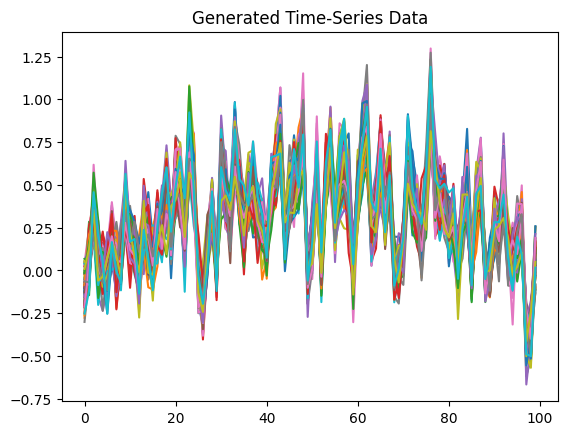

In [11]:
from torch.autograd.variable import Variable
# Generate synthetic time-series data using the trained generator
generated_data = generator(Variable(torch.randn(100,100))).detach().numpy()

# Plot the generator
for series in generated_data:
    plt.plot(index, series) 
plt.title("Generated Time-Series Data")
plt.show()